In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.read_excel("TESTING BD.xlsx",infer_datetime_format=True)
names=df.columns
df.columns=[0]
df_to_explore=df[0].str.split(",",expand=True)
df_to_explore.columns=names[0].split(",")

%%bash
libreoffice --headless --convert-to csv TESTING BD.xlsx  --outdir .
ls

# (1) Loading the data and exploring it


In [2]:
df=pd.read_excel("TESTING BD.xlsx")
names=df.columns
df.columns=[0]
df_to_explore=df[0].str.split(",",expand=True)
df_to_explore.columns=names[0].split(",")
int_type=["Customer Lifetime Value","Income", "Monthly Premium Auto",
 "Months Since Last Claim","Months Since Policy Inception",
 "Number of Open Complaints","Number of Policies","Total Claim Amount"]
# Transform data
for i in int_type:
    df_to_explore[i]=df_to_explore[i].astype(float)
df_to_explore["Effective To Date"]=pd.to_datetime(df_to_explore["Effective To Date"])

# a)

We deal with low memory as well as non null values so there's no worry to pre-process data!

In [3]:
df_to_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   float64       
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [4]:
df_to_explore.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

### Behaviour by due to correlations

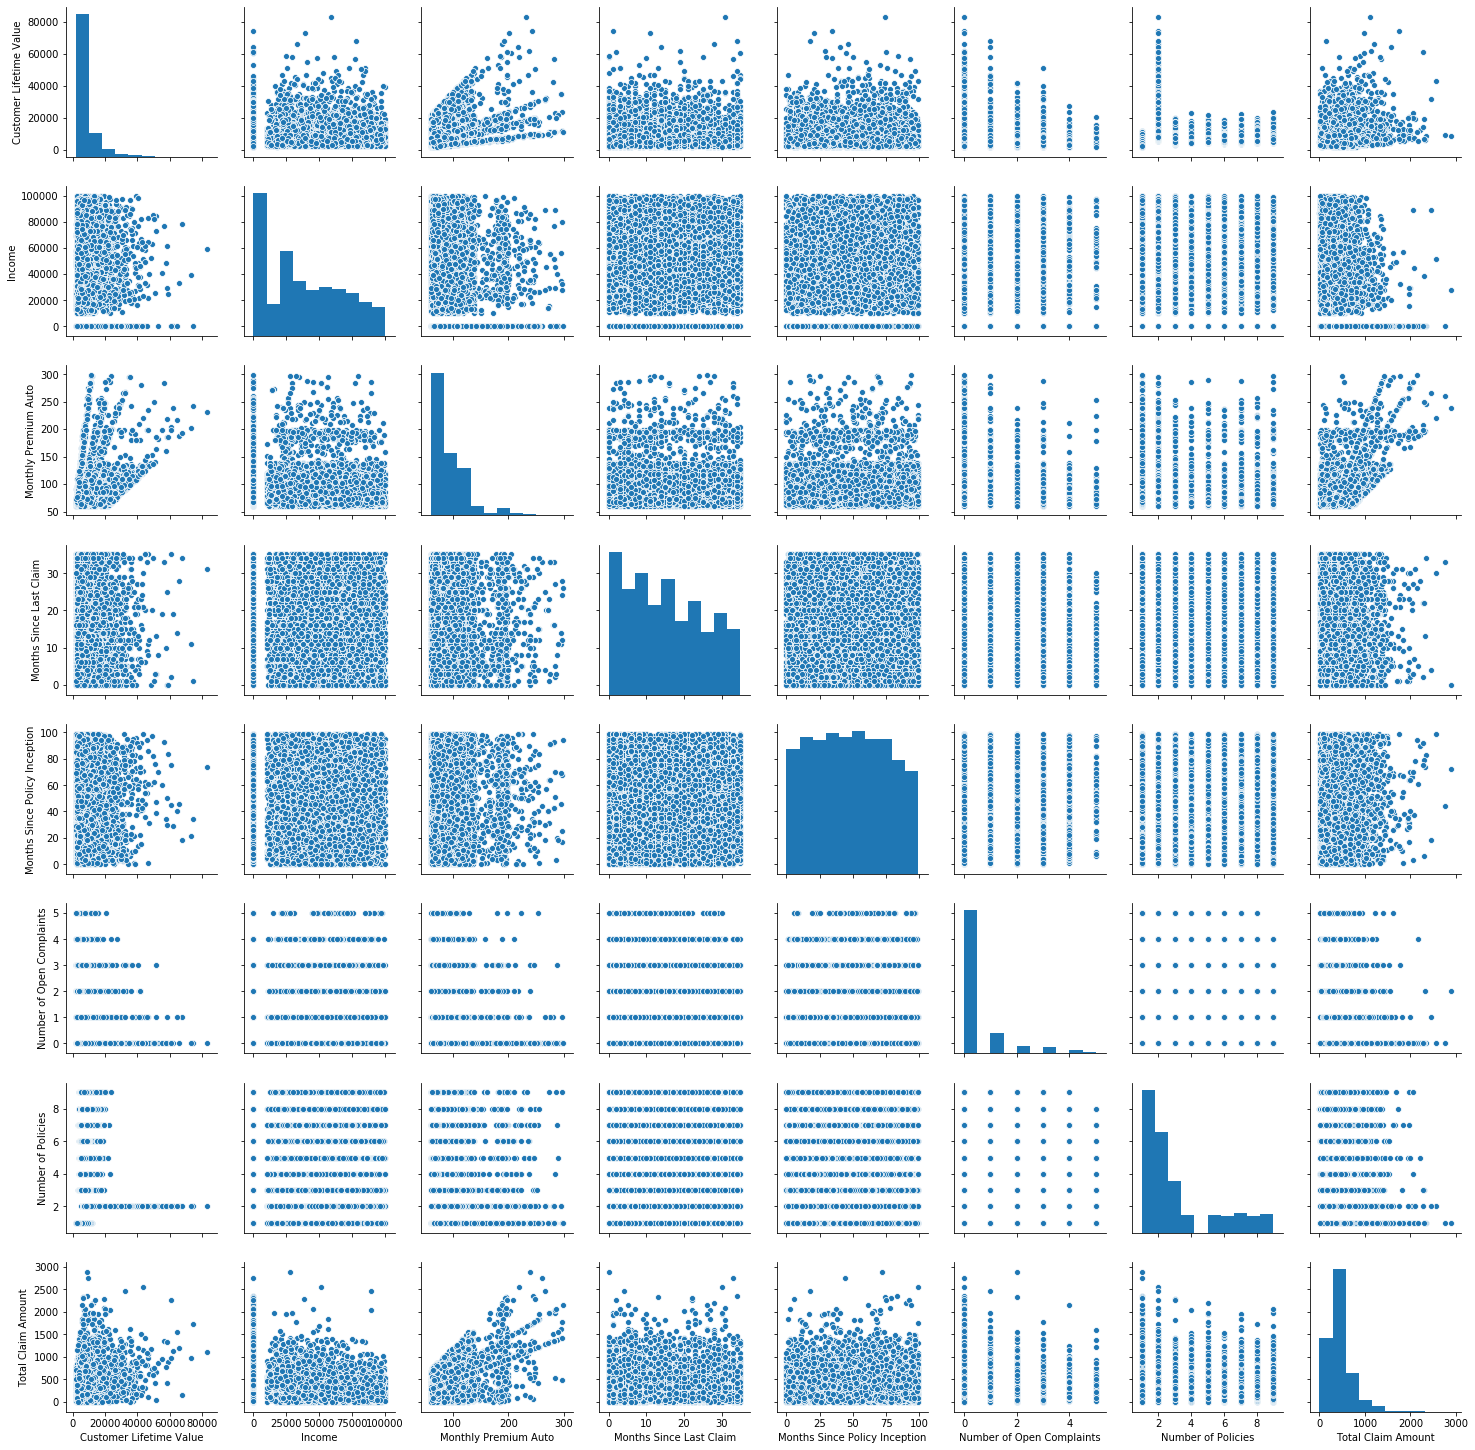

In [5]:
sns.pairplot(data=df_to_explore)

Most of data do not even have a clear correlation so we will explore alternatives to see how different clients react to the different strategies. We will then make it clear by filtering the with the "Sales Channel" 

In [6]:
sns.distributions._has_statsmodels=False

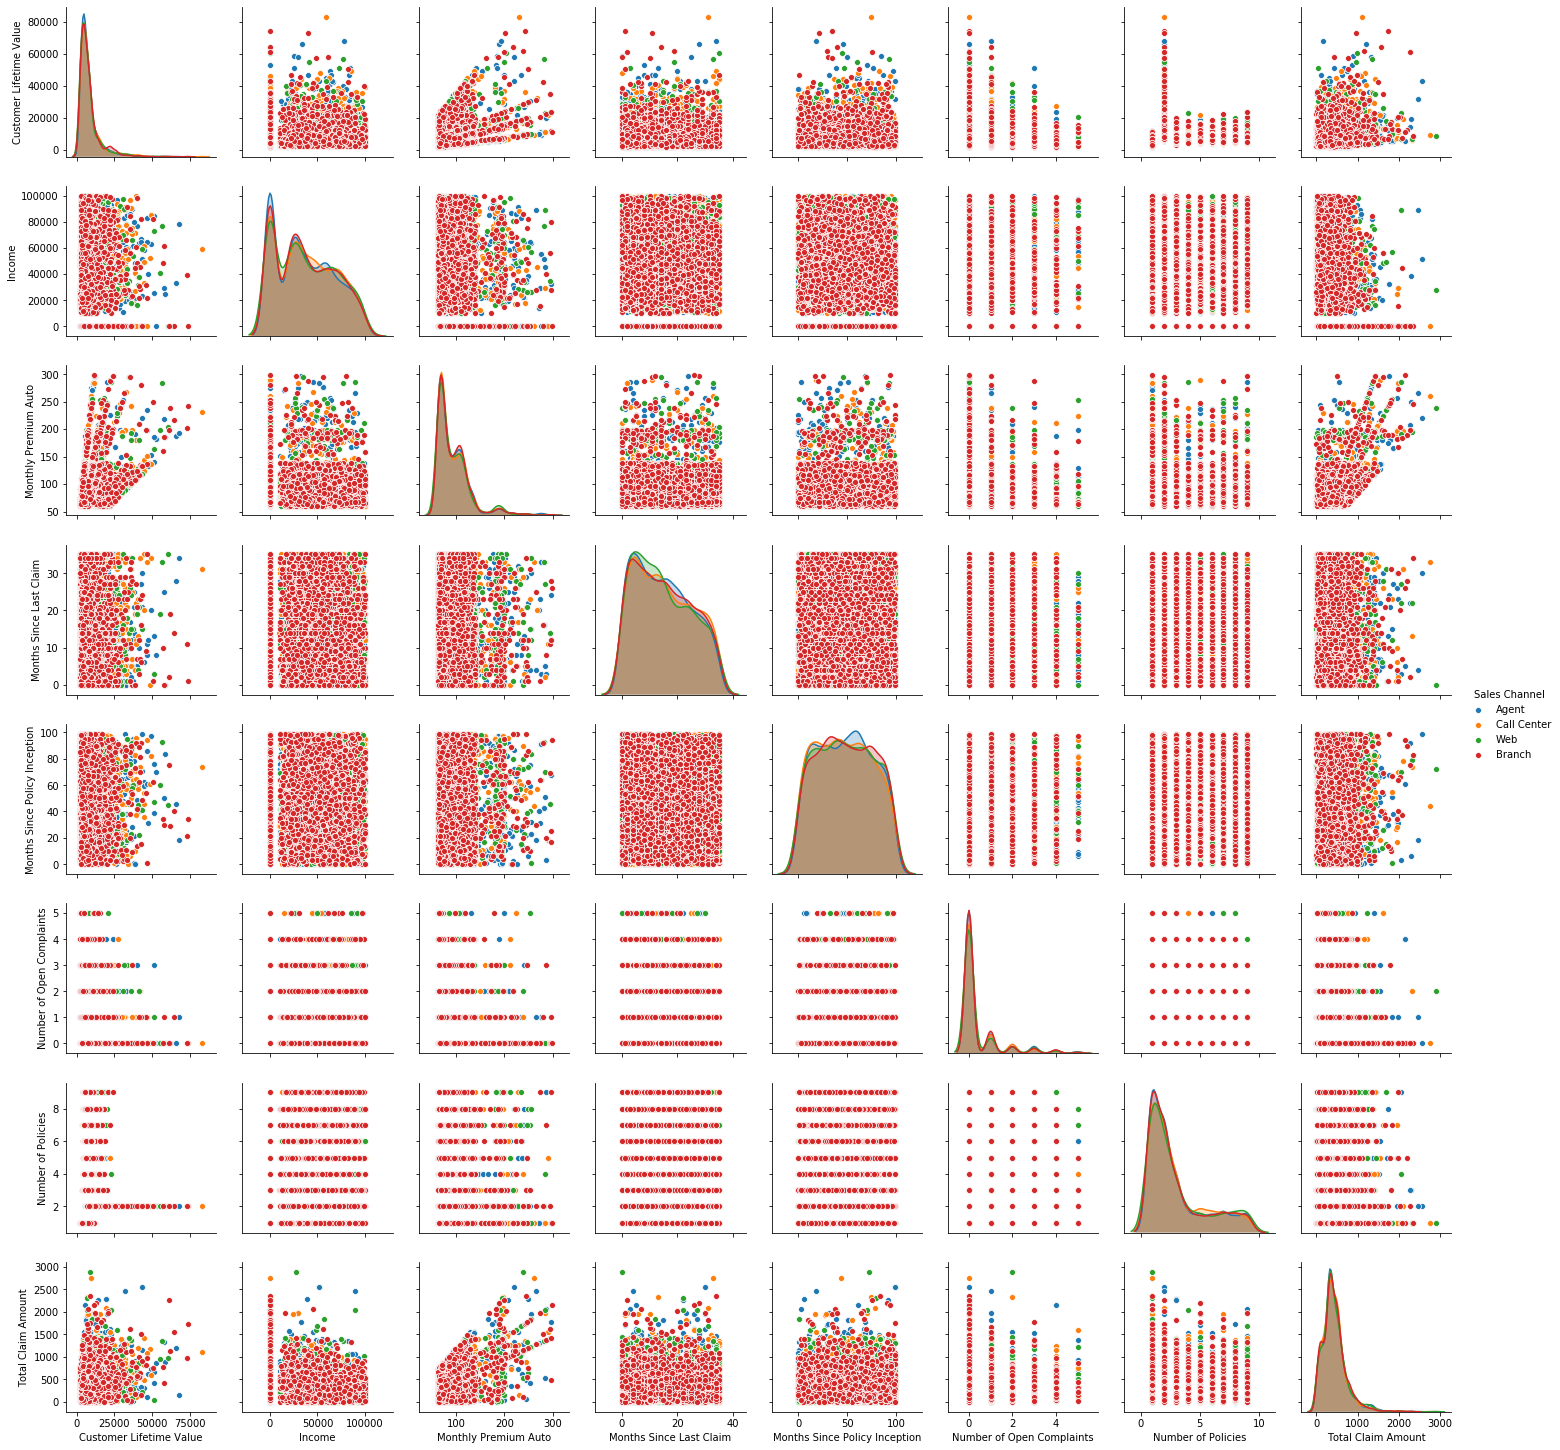

In [7]:
sns.pairplot(data=df_to_explore,hue="Sales Channel")

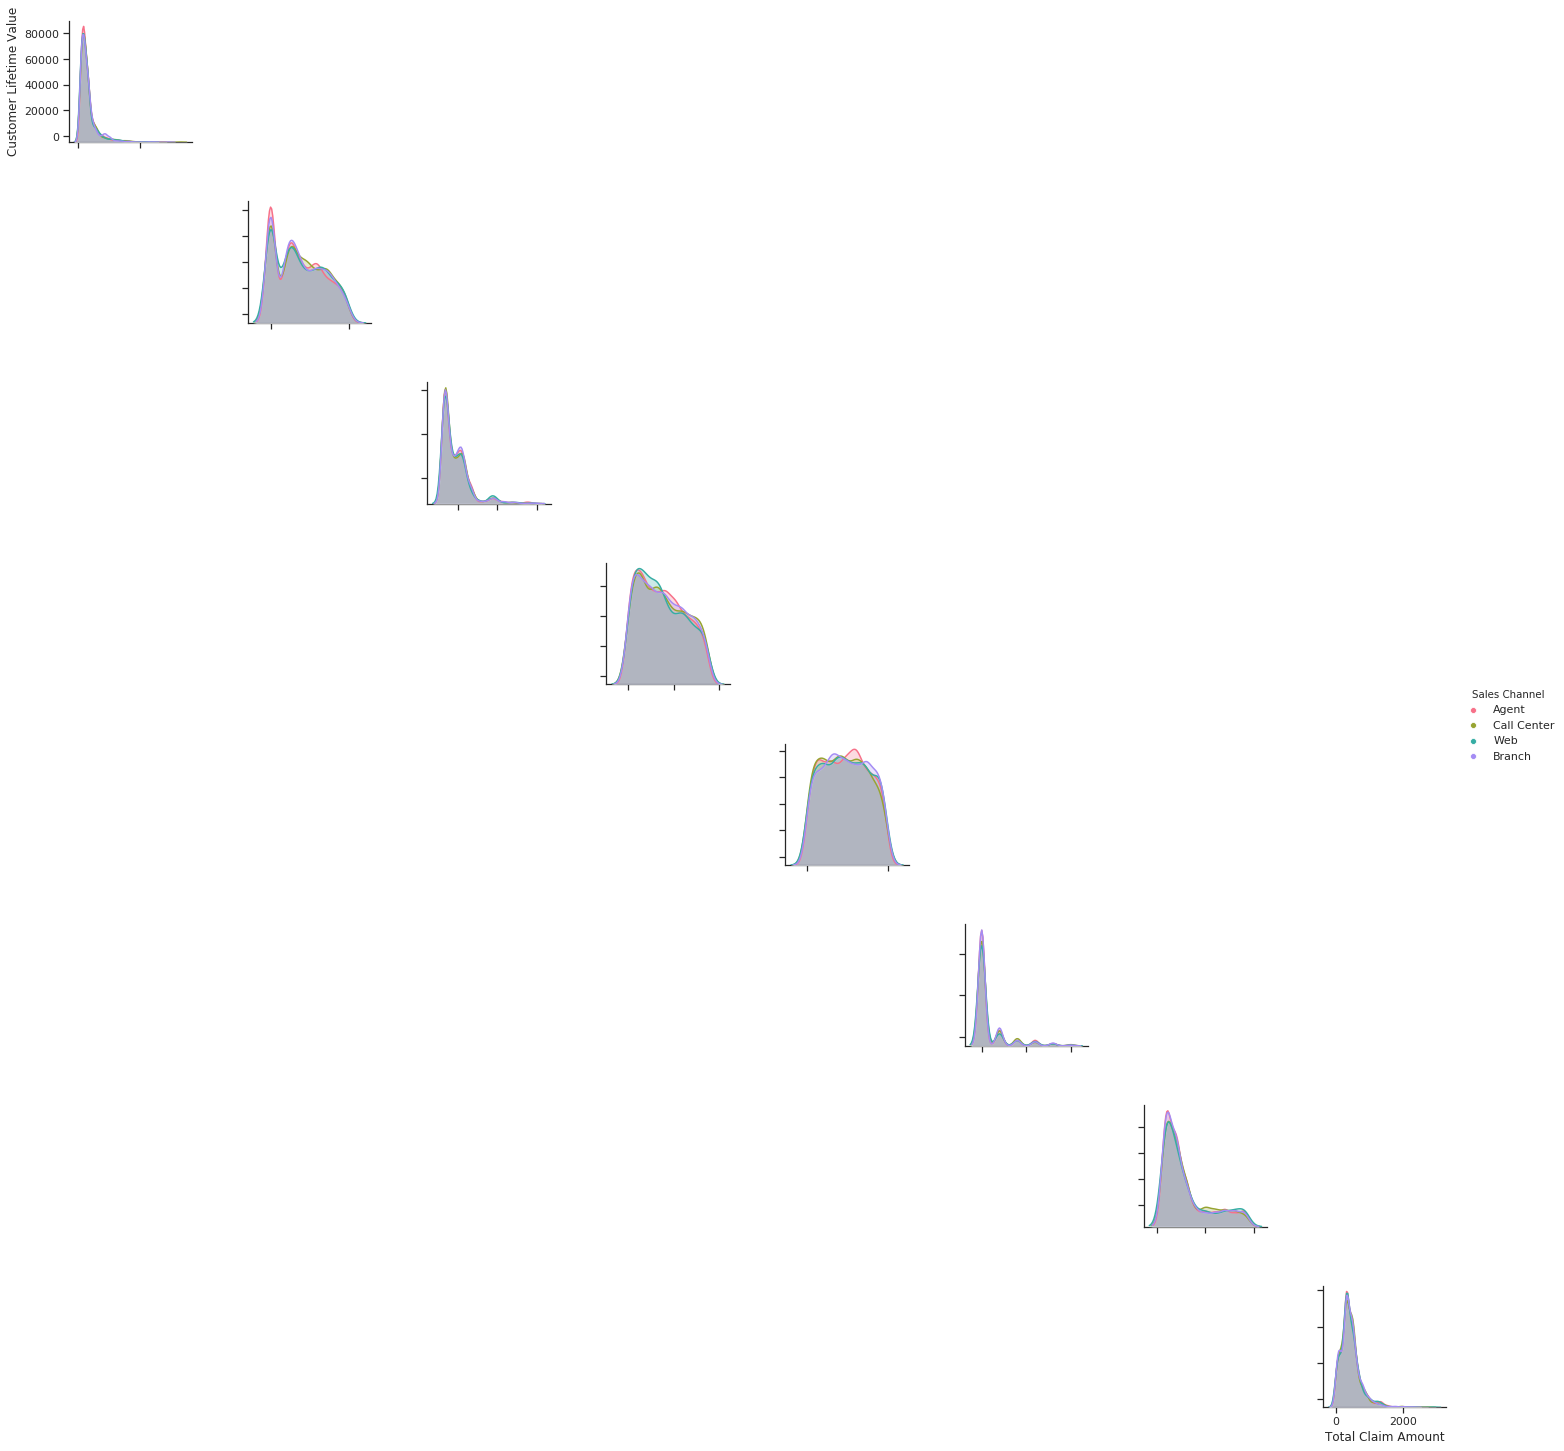

In [8]:
sns.set(style="ticks", color_codes=True)

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
g = sns.pairplot(df_to_explore,hue="Sales Channel", palette="husl")
g.map_upper(hide_current_axis)
g.map_lower(hide_current_axis)

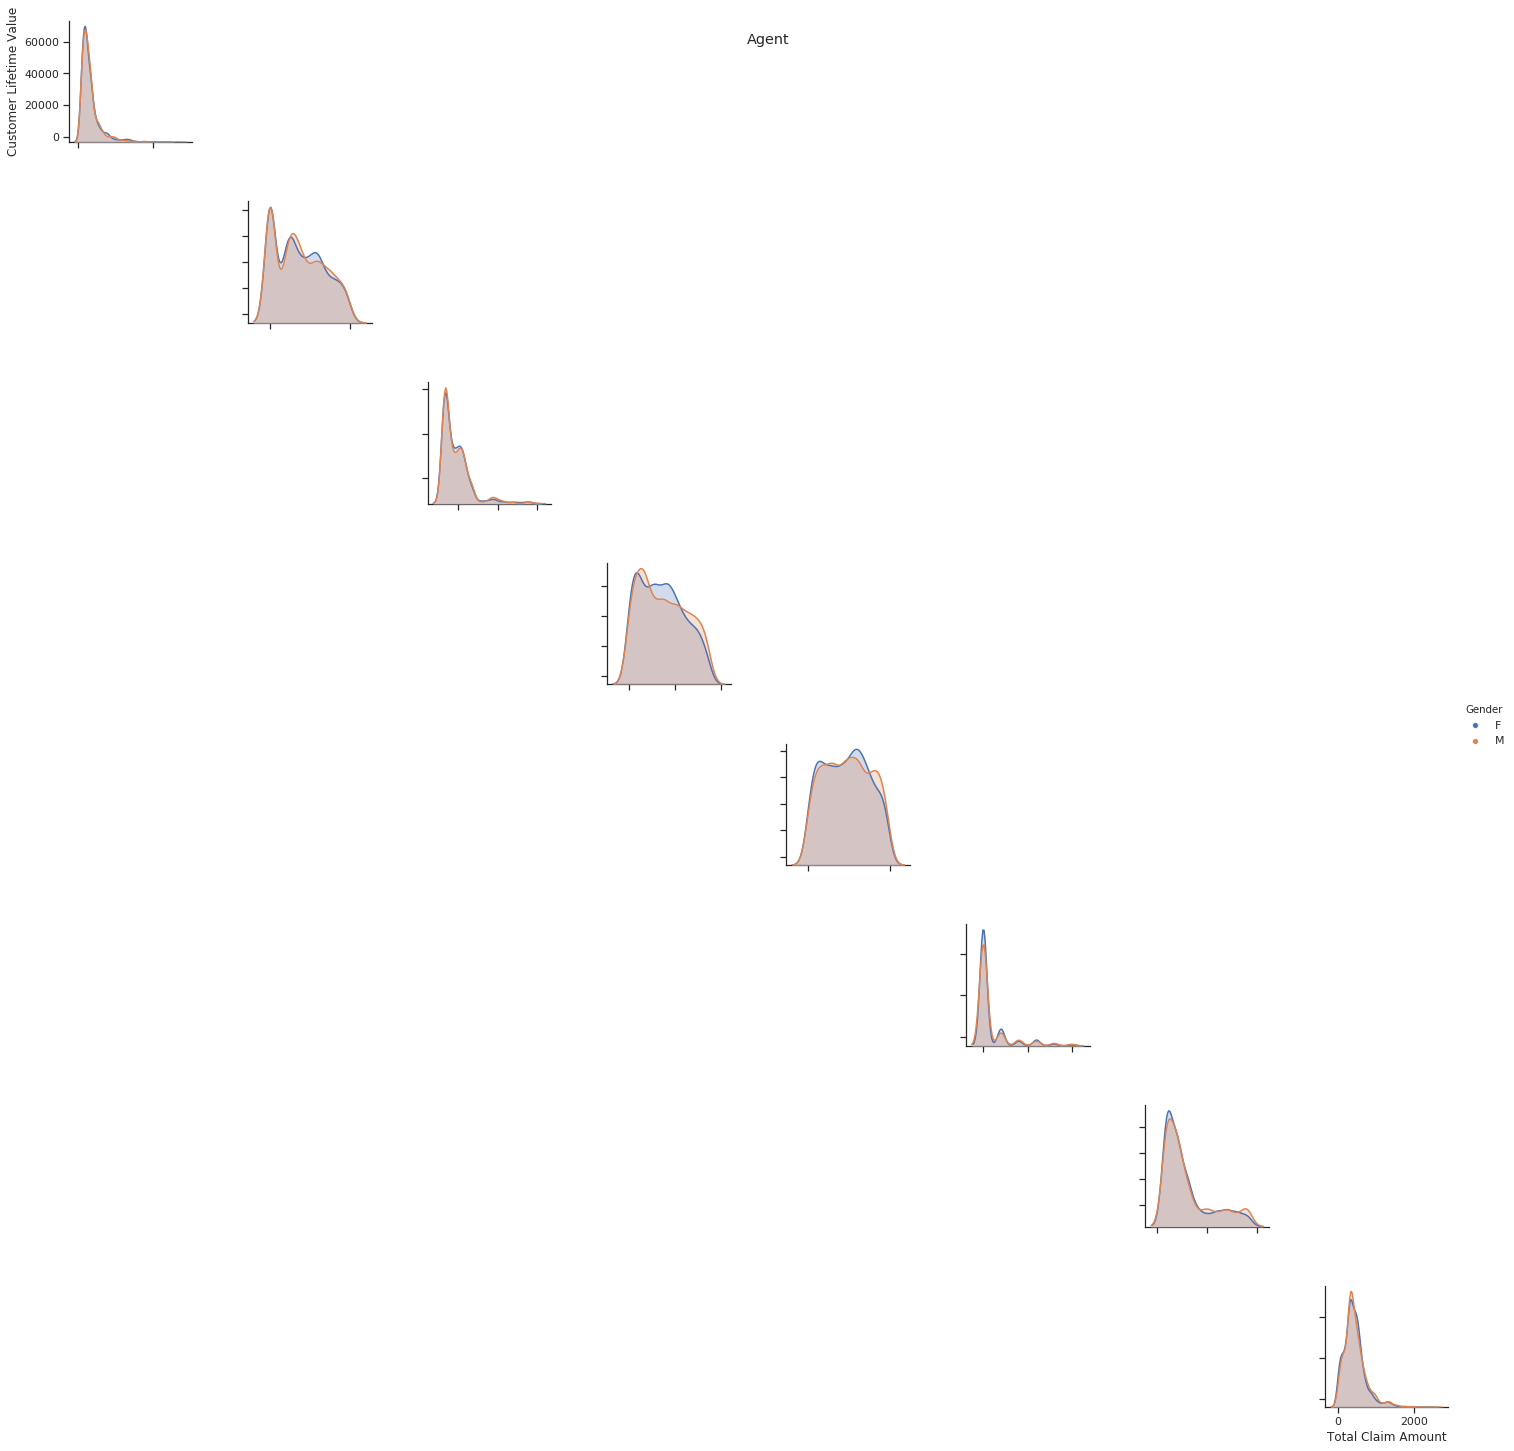

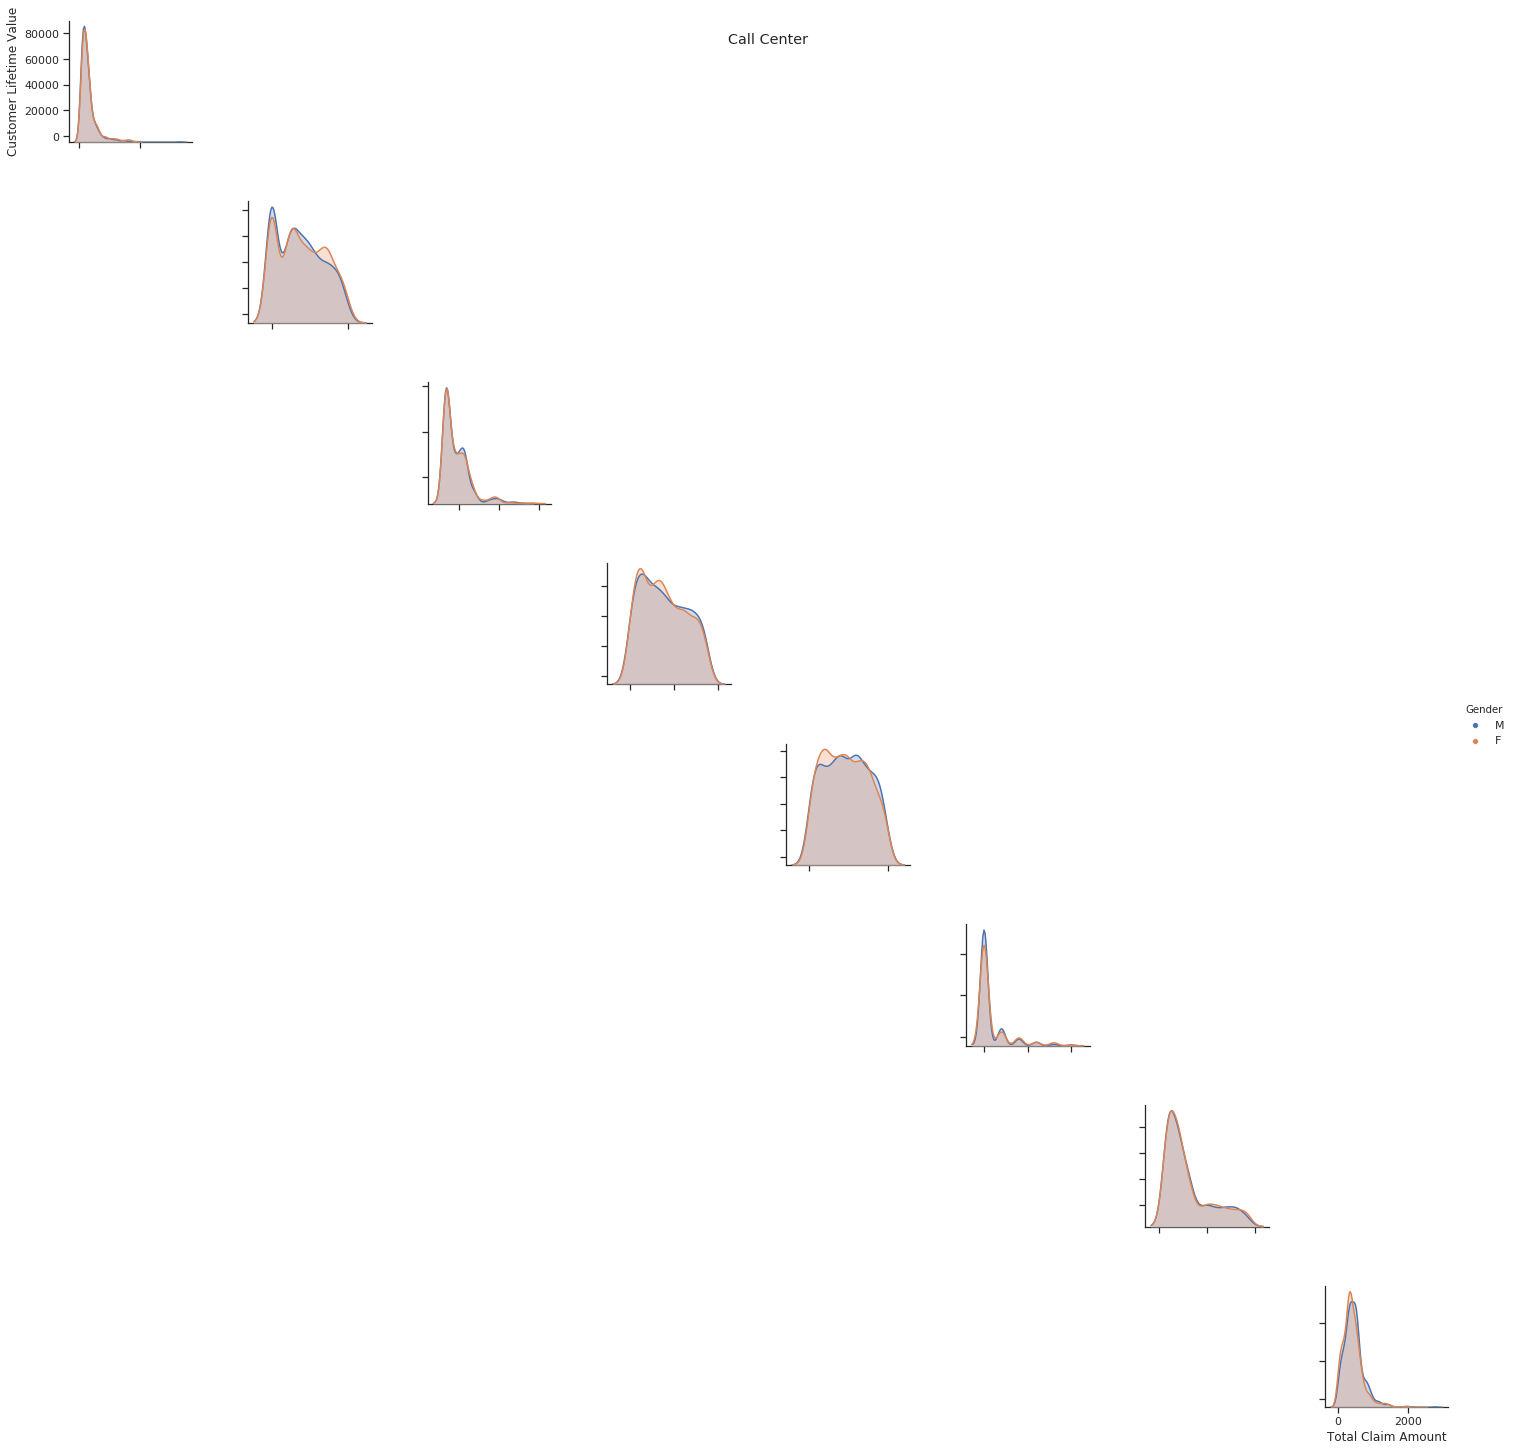

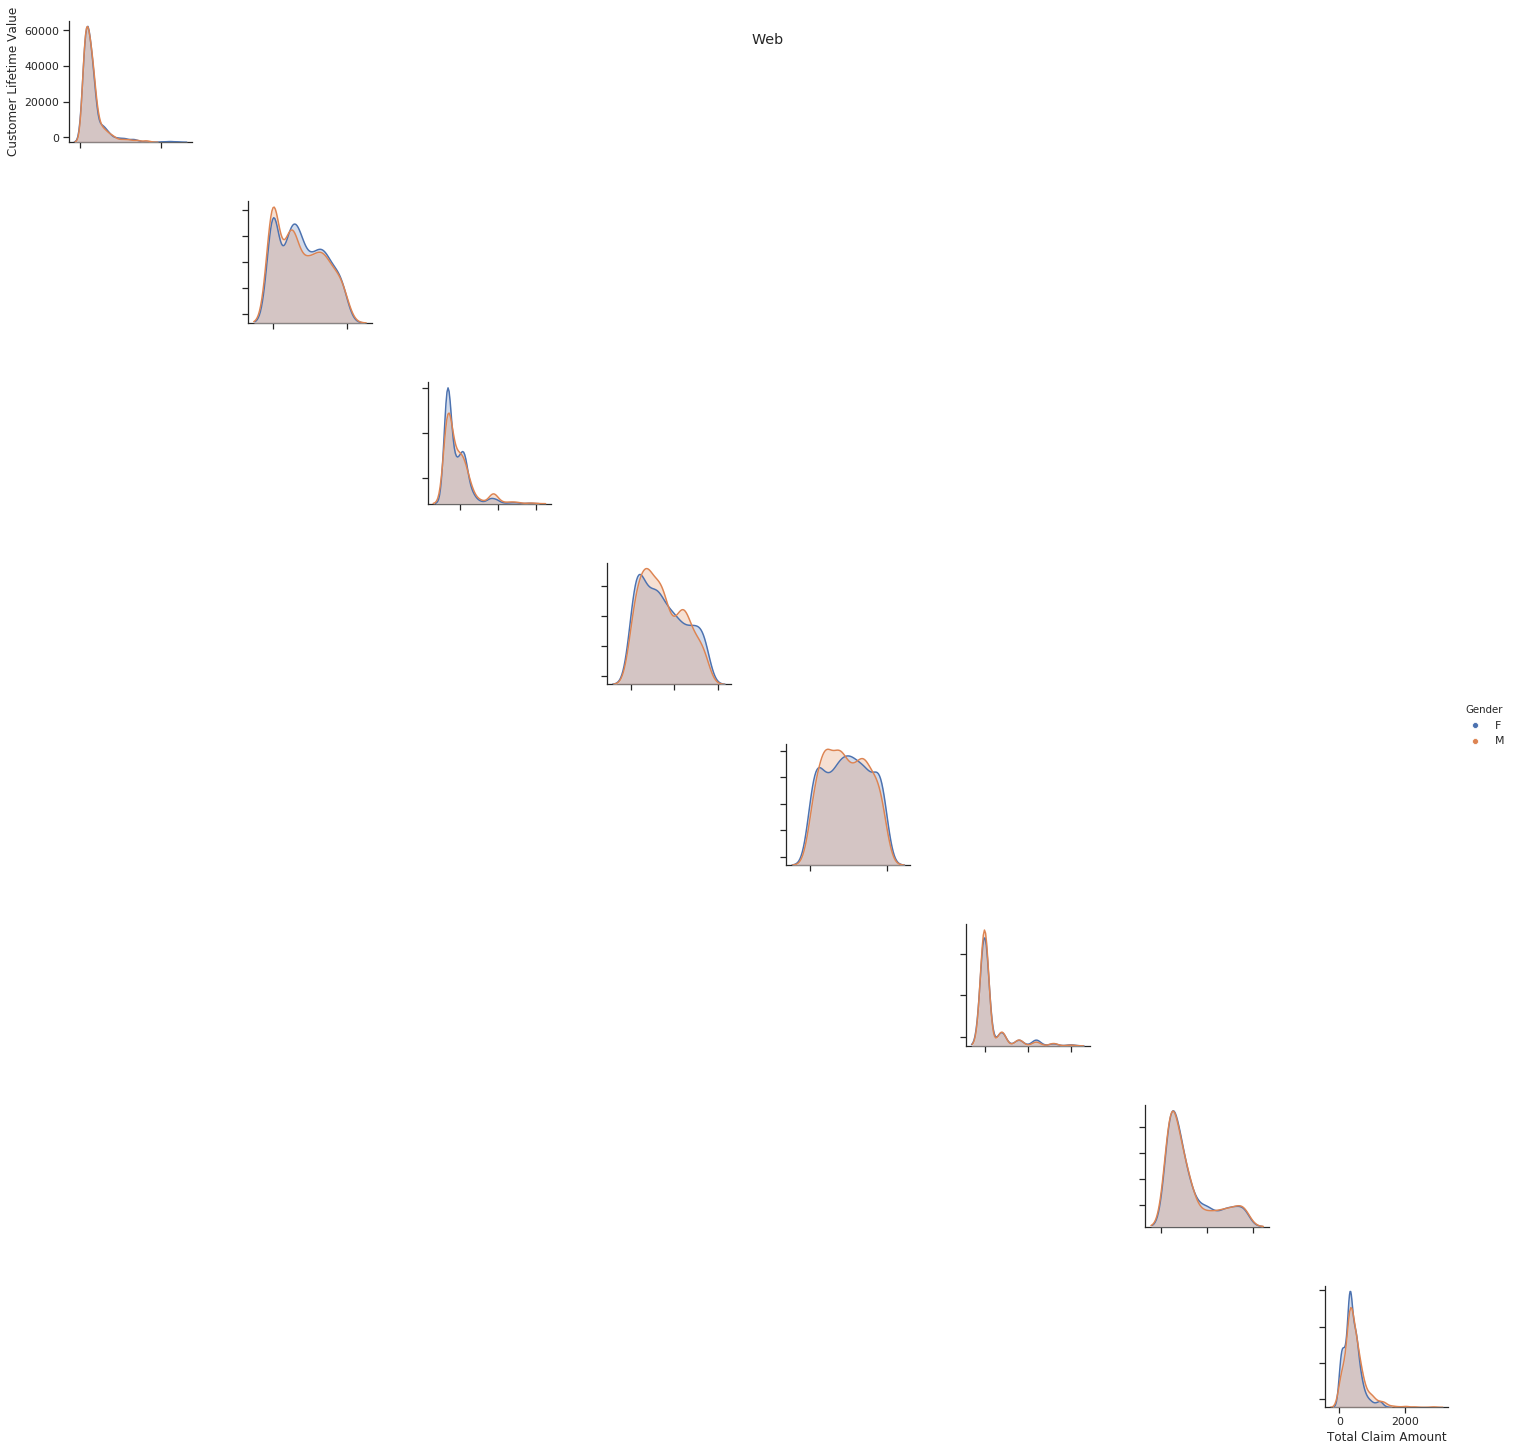

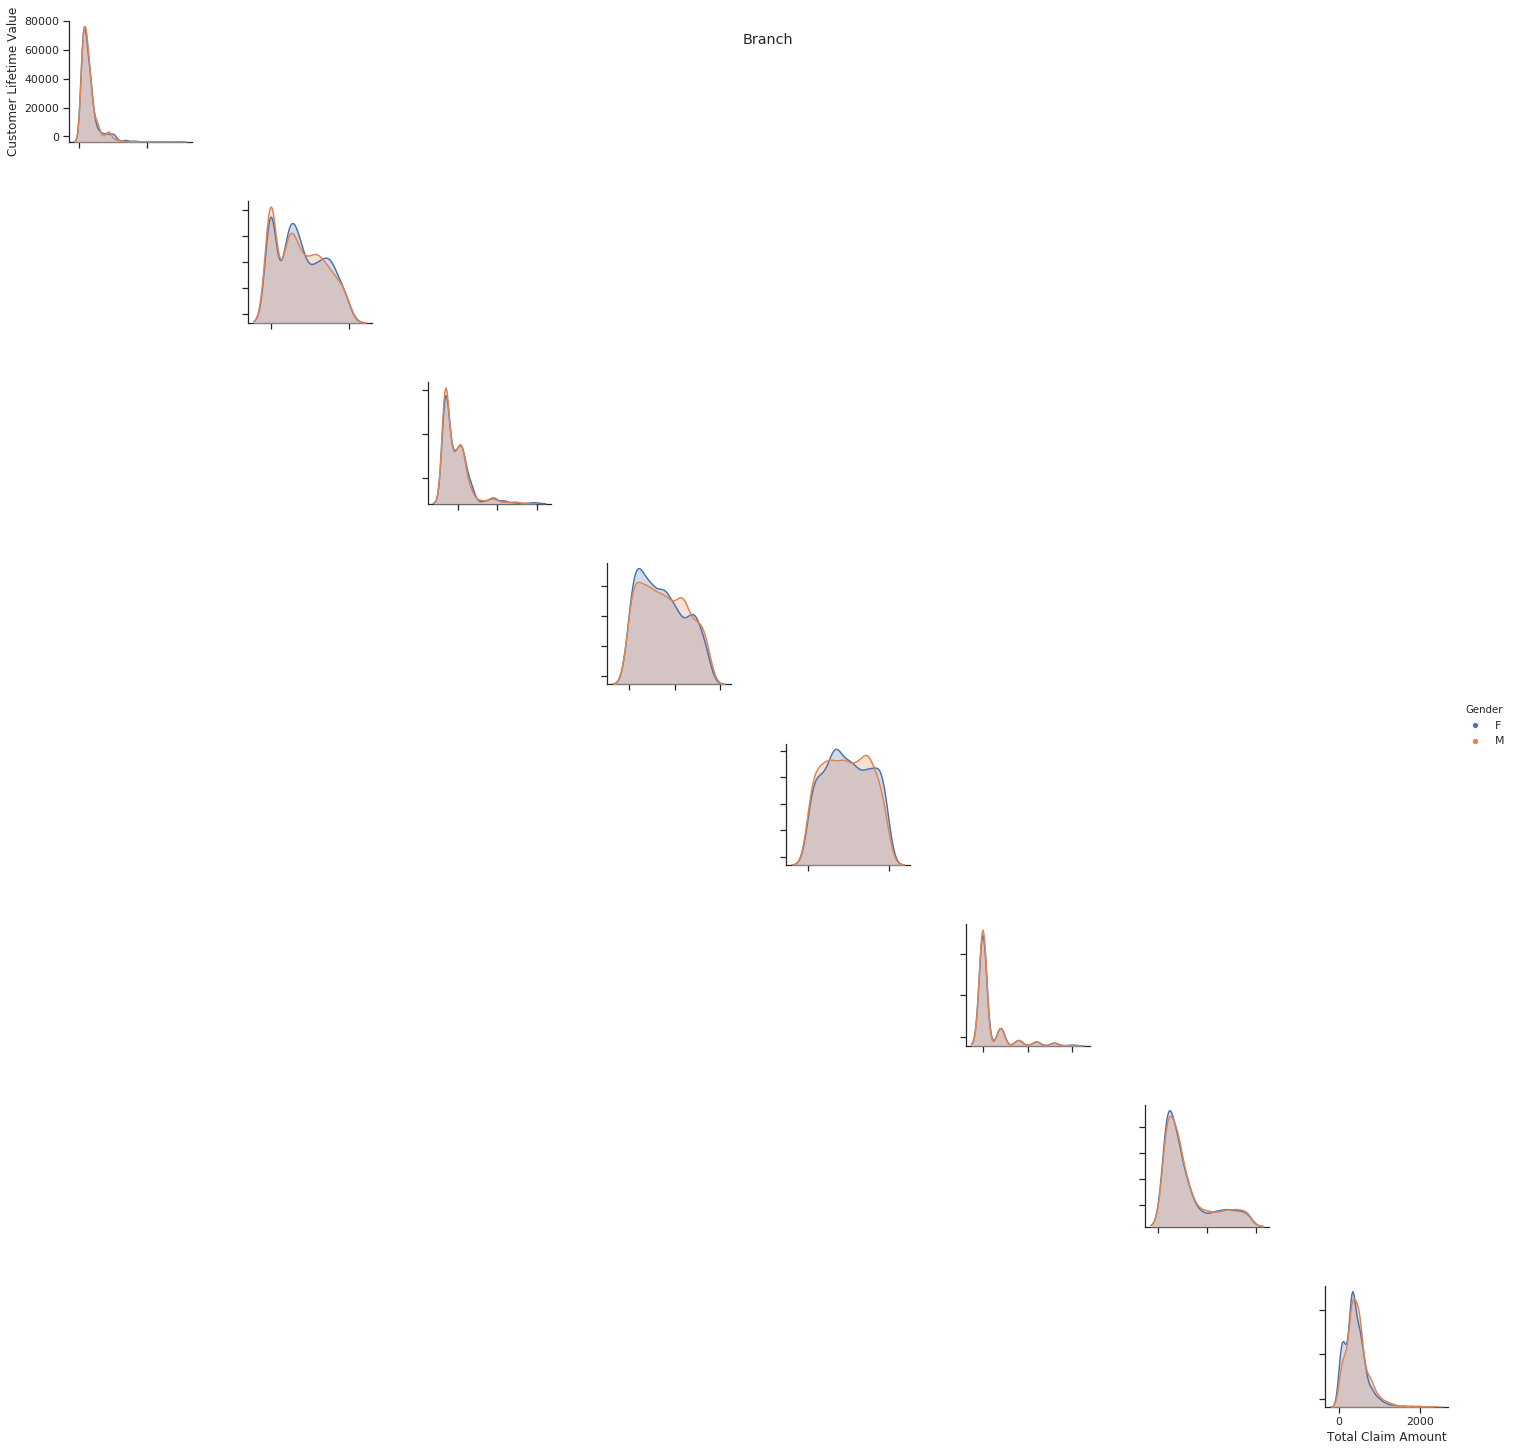

In [9]:
for i in df_to_explore["Sales Channel"].unique():
    g=sns.pairplot(df_to_explore[df_to_explore["Sales Channel"]==i],hue="Gender")
    g.map_upper(hide_current_axis)
    g.map_lower(hide_current_axis)
    g.fig.suptitle(i)

The Data looks all the same, therefore the is no difference at all between the different channels nor in the gender of the users.

# b) Counting the people who "Response"

In [10]:
df_to_explore["Response"].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [11]:
1308/len(df_to_explore) *100

14.320122618786948

__Only the 14% have answered "Yes"!__
Another approach to this problem is to filter the data through the condition of belonging to a certain state and specific sales channel

In [12]:
df_to_explore.groupby(["State","Sales Channel","Response"]).agg(Total=("Gender","count"))

Total
State      Sales Channel Response       
Arizona    Agent         No          518
                         Yes         125
           Branch        No          422
                         Yes          47
           Call Center   No          313
                         Yes          40
           Web           No          207
                         Yes          31
California Agent         No          981
                         Yes         220
           Branch        No          788
                         Yes         112
           Call Center   No          530
                         Yes          75
           Web           No          395
                         Yes          49
Nevada     Agent         No          267
                         Yes          63
           Branch        No          219
                         Yes          28
           Call Center   No          148
                         Yes          15
           Web           No          124
                         Yes          18
Oregon     Agent         No          787
                         Yes         201
           Branch        No          639
                         Yes          80
           Call Center   No          447
                         Yes          50
           Web           No          352
                         Yes          45
Washington Agent         No          258
                         Yes          57
           Branch        No          205
                         Yes          27
           Call Center   No          135
                         Yes          12
           Web           No           91
                         Yes          13

# c) Plotting

In [13]:
df_to_explore.groupby(["State","Response"]).agg(Total=("Gender","count")).unstack(1)

Total     
Response      No  Yes
State                
Arizona     1460  243
California  2694  456
Nevada       758  124
Oregon      2225  376
Washington   689  109

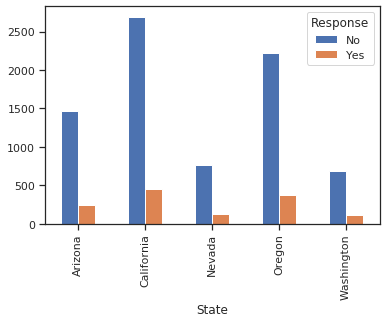

In [14]:
df_to_explore.groupby(["State","Response"]).agg(Total=("Gender","count")).unstack(1)["Total"].plot(kind="bar")
plt.show()

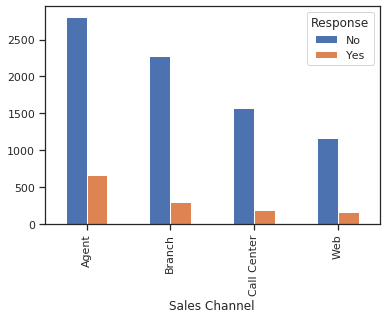

In [15]:
df_to_explore.groupby(["Sales Channel","Response"]).agg(Total=("Gender","count")).unstack(1)["Total"].plot(kind="bar")
plt.show()

# d) Getting the percentages

In [16]:
df_tmp=df_to_explore.groupby(["State","Sales Channel","Response"]).agg(Percentage=("Gender","count"))
df_tmp.groupby(level=0).apply(lambda x: 100*x / float(x.sum()))

Percentage
State      Sales Channel Response            
Arizona    Agent         No         30.416911
                         Yes         7.339988
           Branch        No         24.779800
                         Yes         2.759836
           Call Center   No         18.379331
                         Yes         2.348796
           Web           No         12.155021
                         Yes         1.820317
California Agent         No         31.142857
                         Yes         6.984127
           Branch        No         25.015873
                         Yes         3.555556
           Call Center   No         16.825397
                         Yes         2.380952
           Web           No         12.539683
                         Yes         1.555556
Nevada     Agent         No         30.272109
                         Yes         7.142857
           Branch        No         24.829932
                         Yes         3.174603
           Call Center   No         16.780045
                         Yes         1.700680
           Web           No         14.058957
                         Yes         2.040816
Oregon     Agent         No         30.257593
                         Yes         7.727797
           Branch        No         24.567474
                         Yes         3.075740
           Call Center   No         17.185698
                         Yes         1.922338
           Web           No         13.533256
                         Yes         1.730104
Washington Agent         No         32.330827
                         Yes         7.142857
           Branch        No         25.689223
                         Yes         3.383459
           Call Center   No         16.917293
                         Yes         1.503759
           Web           No         11.403509
                         Yes         1.629073

or simply

# f) segmenting by offer

In [17]:
df_tmp=df_to_explore.groupby((["Renew Offer Type","Response"])).agg(Percentage=("Gender","count"))
df_tmp.groupby(level=0).apply(lambda x: 100*x / float(x.sum()))

Percentage
Renew Offer Type Response            
Offer1           No         84.168443
                 Yes        15.831557
Offer2           No         76.623377
                 Yes        23.376623
Offer3           No         97.905028
                 Yes         2.094972
Offer4           No        100.000000

In [18]:
df_tmp=df_to_explore.groupby((["State","Renew Offer Type","Response"])).agg(Percentage=("Gender","count"))
df_tmp.groupby(level=0).apply(lambda x: 100*x / float(x.sum()))

Percentage
State      Renew Offer Type Response            
Arizona    Offer1           No         34.351145
                            Yes         6.517910
           Offer2           No         25.073400
                            Yes         7.281268
           Offer3           No         15.091016
                            Yes         0.469759
           Offer4           No         11.215502
California Offer1           No         33.841270
                            Yes         6.666667
           Offer2           No         24.476190
                            Yes         7.587302
           Offer3           No         16.031746
                            Yes         0.222222
           Offer4           No         11.174603
Nevada     Offer1           No         35.487528
                            Yes         6.009070
           Offer2           No         24.263039
                            Yes         7.823129
           Offer3           No         14.512472
                            Yes         0.226757
           Offer4           No         11.678005
Oregon     Offer1           No         35.024990
                            Yes         6.305267
           Offer2           No         24.336794
                            Yes         7.727797
           Offer3           No         15.032680
                            Yes         0.422914
           Offer4           No         11.149558
Washington Offer1           No         35.463659
                            Yes         7.017544
           Offer2           No         24.686717
                            Yes         6.390977
           Offer3           No         15.162907
                            Yes         0.250627
           Offer4           No         11.027569

Offer 4 was always rejected

# f) show engaged customers

In [19]:
df_to_explore[df_to_explore["Response"]=="Yes"]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902.0,...,94.0,0.0,2.0,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350.0,...,13.0,0.0,9.0,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072.0,...,3.0,0.0,2.0,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
13,SJ95423,Arizona,8819.018934,Yes,Basic,High School or Below,2011-01-10,Employed,M,99845.0,...,25.0,1.0,8.0,Corporate Auto,Corporate L3,Offer2,Branch,528.000000,SUV,Medsize
22,YH23384,Arizona,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072.0,...,3.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,RA89822,California,34611.378960,Yes,Basic,High School or Below,2011-01-14,Employed,F,20090.0,...,59.0,0.0,2.0,Personal Auto,Personal L2,Offer2,Agent,523.200000,Sports Car,Medsize
9119,YX35990,California,5479.555081,Yes,Basic,Master,2011-01-13,Employed,M,56005.0,...,30.0,1.0,3.0,Corporate Auto,Corporate L2,Offer1,Branch,326.400000,Four-Door Car,Small
9122,FH43628,California,25464.820590,Yes,Extended,College,2011-02-01,Retired,F,13663.0,...,66.0,0.0,2.0,Personal Auto,Personal L2,Offer1,Branch,465.600000,Four-Door Car,Small
9123,WZ45103,California,5678.050167,Yes,Extended,Bachelor,2011-01-19,Unemployed,F,0.0,...,44.0,0.0,3.0,Personal Auto,Personal L2,Offer2,Agent,364.800000,Four-Door Car,Small


# g) Count engaged customers grouped by renewal offer

In [20]:
df_to_explore.groupby((["Renew Offer Type","Response"])).agg(Total=("Gender","count"))

Percentage
Renew Offer Type Response            
Offer1           No              3158
                 Yes              594
Offer2           No              2242
                 Yes              684
Offer3           No              1402
                 Yes               30
Offer4           No              1024

# h) Plotting

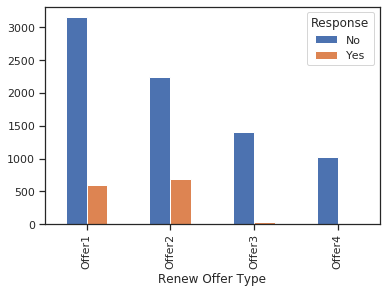

In [21]:
df_tmp=df_to_explore.groupby((["Renew Offer Type","Response"])).agg(Total=("Gender","count"))
df_tmp.unstack(1)["Total"].plot(kind="bar")
plt.show()

# I)

In [22]:
df_to_explore.groupby((["Renew Offer Type","Vehicle Class","Response"])).agg(Total=("Gender","count"))

Total
Renew Offer Type Vehicle Class Response       
Offer1           Four-Door Car No         1533
                               Yes         264
                 Luxury Car    No           62
                               Yes           6
                 Luxury SUV    No           71
                               Yes          18
                 SUV           No          724
                               Yes         168
                 Sports Car    No          185
                               Yes          42
                 Two-Door Car  No          583
                               Yes          96
Offer2           Four-Door Car No         1197
                               Yes         336
                 Luxury Car    No           35
                               Yes           6
                 Luxury SUV    No           35
                               Yes          12
                 SUV           No          360
                               Yes         120
                 Sports Car    No          106
                               Yes          48
                 Two-Door Car  No          509
                               Yes         162
Offer3           Four-Door Car No          721
                               Yes          24
                 Luxury Car    No           31
                 Luxury SUV    No           27
                 SUV           No          276
                 Sports Car    No           68
                 Two-Door Car  No          279
                               Yes           6
Offer4           Four-Door Car No          546
                 Luxury Car    No           23
                 Luxury SUV    No           21
                 SUV           No          148
                 Sports Car    No           35
                 Two-Door Car  No          251

# J) Unstacking the output

In [23]:
df_to_explore.groupby((["Renew Offer Type","Vehicle Class","Response"])).agg(Total=("Gender","count"))["Total"].reset_index()

,Renew Offer Type,Vehicle Class,Response,Total
0,Offer1,Four-Door Car,No,1533
1,Offer1,Four-Door Car,Yes,264
2,Offer1,Luxury Car,No,62
3,Offer1,Luxury Car,Yes,6
4,Offer1,Luxury SUV,No,71
5,Offer1,Luxury SUV,Yes,18
6,Offer1,SUV,No,724
7,Offer1,SUV,Yes,168
8,Offer1,Sports Car,No,185
9,Offer1,Sports Car,Yes,42


# K)

In [24]:
df_to_explore[df_to_explore["Response"]=="Yes"].groupby((["Renew Offer Type","Vehicle Class"])).agg(Total=("Gender","count"))["Total"].unstack()

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,264.0,6.0,18.0,168.0,42.0,96.0
Offer2,336.0,6.0,12.0,120.0,48.0,162.0
Offer3,24.0,NaN,NaN,NaN,NaN,6.0


In [25]:
df_to_explore[df_to_explore["Response"]=="Yes"].groupby((["Vehicle Class","Renew Offer Type"])).agg(Total=("Gender","count"))["Total"].unstack()

Renew Offer Type,Offer1,Offer2,Offer3
Vehicle Class,,,
Four-Door Car,264.0,336.0,24.0
Luxury Car,6.0,6.0,NaN
Luxury SUV,18.0,12.0,NaN
SUV,168.0,120.0,NaN
Sports Car,42.0,48.0,NaN
Two-Door Car,96.0,162.0,6.0


# I)

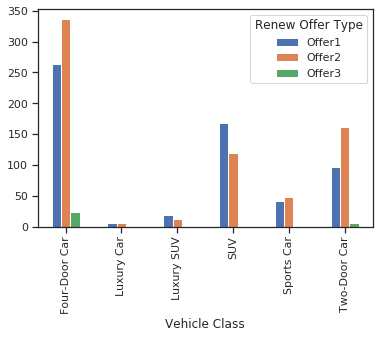

In [26]:
df_to_explore[df_to_explore["Response"]=="Yes"].groupby((["Vehicle Class","Renew Offer Type"])).agg(Total=("Gender","count"))["Total"].unstack().plot(kind="bar")

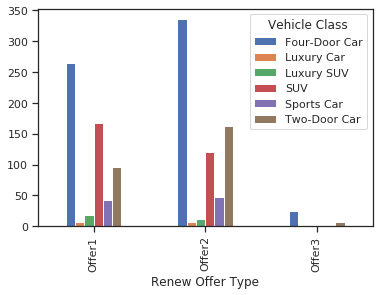

In [27]:
df_to_explore[df_to_explore["Response"]=="Yes"].groupby((["Renew Offer Type", "Vehicle Class"])).agg(Total=("Gender","count"))["Total"].unstack().plot(kind="bar")

# 2) 

In [28]:
df_to_explore.groupby((["Sales Channel","Response"])).agg(Total=("Gender","count"))

Total
Sales Channel Response       
Agent         No         2811
              Yes         666
Branch        No         2273
              Yes         294
Call Center   No         1573
              Yes         192
Web           No         1169
              Yes         156

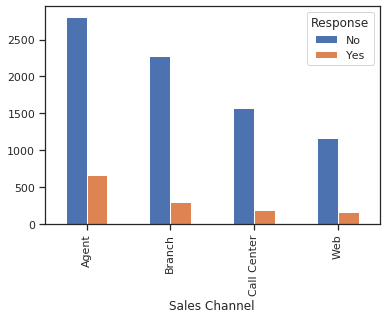

In [29]:
df_to_explore.groupby((["Sales Channel","Response"])).agg(Total=("Gender","count"))["Total"].unstack().plot(kind="bar")

The most effective is the "Agent" sales channel followed by "Branch" 

# 3) Show if whether customers with various vehicle sizes respond differently to different sales channels.

In [30]:
df_to_explore.groupby((["Sales Channel","Vehicle Size","Response"])).agg(Total=("Gender","count"))

Total
Sales Channel Vehicle Size Response       
Agent         Large        No          269
                           Yes          72
              Medsize      No         1967
                           Yes         504
              Small        No          575
                           Yes          90
Branch        Large        No          237
                           Yes          54
              Medsize      No         1588
                           Yes         192
              Small        No          448
                           Yes          48
Call Center   Large        No          161
                           Yes          24
              Medsize      No         1098
                           Yes         120
              Small        No          314
                           Yes          48
Web           Large        No          111
                           Yes          18
              Medsize      No          829
                           Yes         126
              Small        No          229
                           Yes          12

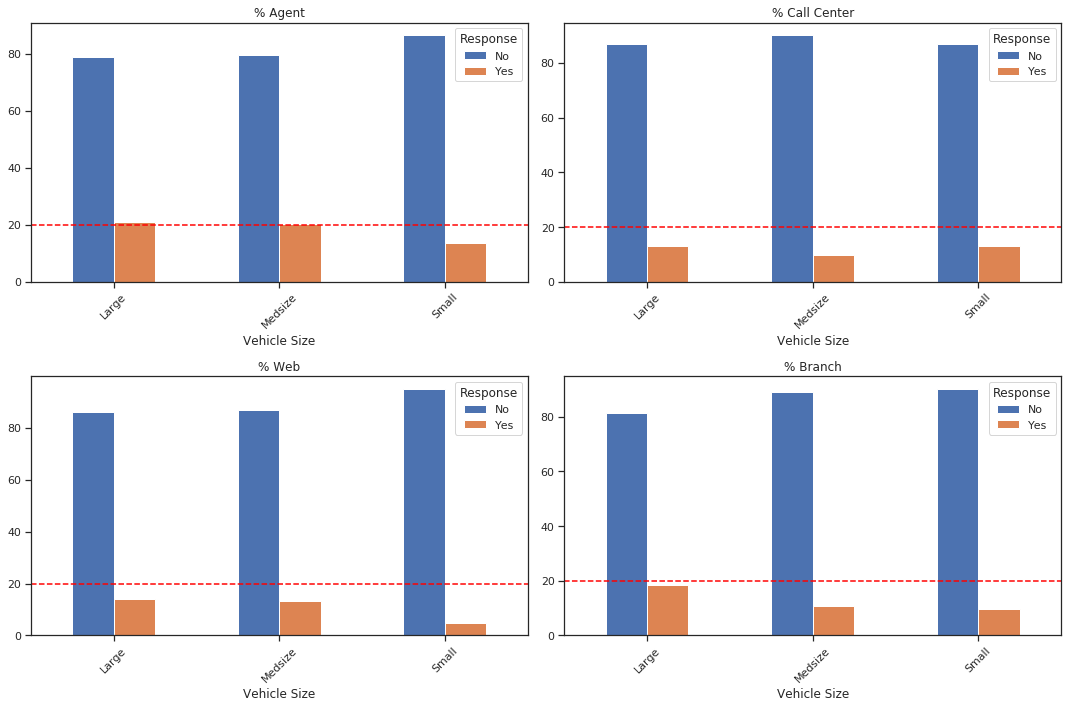

In [31]:

plt.figure(figsize=(15,10))
k=1
for i in df_to_explore["Sales Channel"].unique():
    ax=plt.subplot(2,2,k)
    df_tmp=df_to_explore[df_to_explore["Sales Channel"]==i].groupby(["Vehicle Size","Response"]).agg(Total=("Gender","count"))
    df_tmp.groupby(level=0).apply(lambda x: 100*x / float(x.sum()))["Total"].unstack().plot(kind="bar",ax=ax, rot = 45, title ="% "+i)
    plt.axhline(y=20,color="red",linestyle="--")
    k+=1
plt.tight_layout()
plt.show()

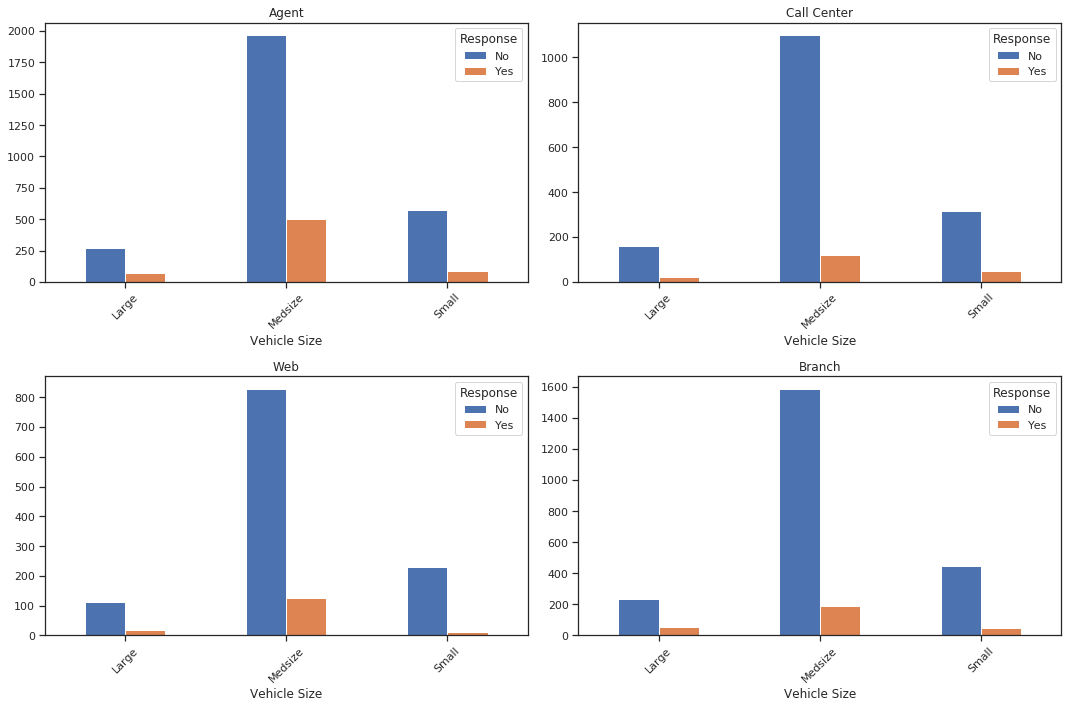

In [32]:
plt.figure(figsize=(15,10))
k=1
for i in df_to_explore["Sales Channel"].unique():
    ax=plt.subplot(2,2,k)
    df_to_explore[df_to_explore["Sales Channel"]==i].groupby(["Vehicle Size","Response"]).agg(Total=("Gender","count"))["Total"].unstack().plot(kind="bar",ax=ax, rot = 45, title =i)
    k+=1
plt.tight_layout()
plt.show()

There is a clear difference between the engagement present in different sales channel when consider the size of the vehicle. For all cases the "medsize" is the size that has better engagement for all channel and again we reinforce what we said before: The channel that performs the best is "Agent" 

# 5) Policy rates by month

In [33]:
df_to_explore.groupby(["Response","Months Since Policy Inception"]).agg(Total=("Gender","count"))

Total
Response Months Since Policy Inception       
No       0.0                               71
         1.0                               73
         2.0                               71
         3.0                               84
         4.0                               73
...                                       ...
Yes      93.0                              24
         94.0                              18
         95.0                              12
         96.0                              12
         99.0                               6

[191 rows x 1 columns]

In [34]:
df_to_explore.groupby(["Response","Months Since Policy Inception"]).agg(Total=("Gender","count"))

Total
Response Months Since Policy Inception       
No       0.0                               71
         1.0                               73
         2.0                               71
         3.0                               84
         4.0                               73
...                                       ...
Yes      93.0                              24
         94.0                              18
         95.0                              12
         96.0                              12
         99.0                               6

[191 rows x 1 columns]

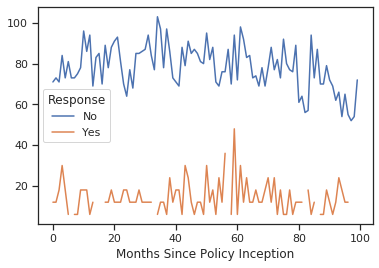

In [35]:
df_to_explore.groupby(["Response","Months Since Policy Inception"]).agg(Total=("Gender","count"))["Total"].unstack(0).plot()

In [36]:
conditions = [
    (df_to_explore['Months Since Policy Inception'] <= 20),
    (df_to_explore['Months Since Policy Inception'] > 20) & (df_to_explore['Months Since Policy Inception'] <= 40),
    (df_to_explore['Months Since Policy Inception'] > 40) & (df_to_explore['Months Since Policy Inception'] <= 60),
    (df_to_explore['Months Since Policy Inception'] > 60) & (df_to_explore['Months Since Policy Inception'] <= 80),
    (df_to_explore['Months Since Policy Inception'] > 80) & (df_to_explore['Months Since Policy Inception'] <= 100),
    ]
values = ['New', 'Medium_new', 'Medium_old', 'Old','Quite_old']
df_to_explore['Months range'] = np.select(conditions, values)

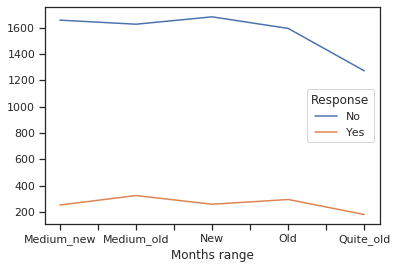

In [37]:
df_to_explore.groupby(["Response","Months range"]).agg(Total=("Gender","count"))["Total"].unstack(0).plot()

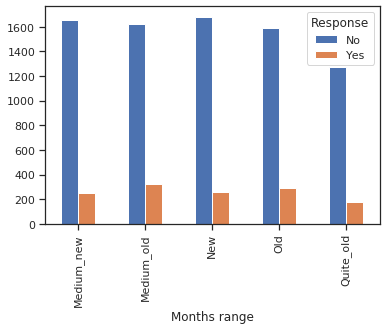

In [38]:
df_to_explore.groupby(["Response","Months range"]).agg(Total=("Gender","count"))["Total"].unstack(0).plot(kind="bar")

In [39]:
df_to_explore.groupby(["Response","Months range"]).agg(Total=("Gender","count"))

Total
Response Months range       
No       Medium_new     1656
         Medium_old     1625
         New            1681
         Old            1593
         Quite_old      1271
Yes      Medium_new      252
         Medium_old      324
         New             258
         Old             294
         Quite_old       180

# 6) Customer segmentation

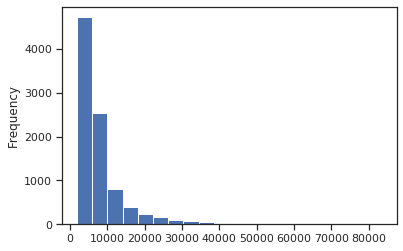

In [40]:
df_to_explore["Customer Lifetime Value"].plot.hist(bins=20)

In [41]:
conditions = [
    (df_to_explore['Customer Lifetime Value'] <= 5_000),
    (df_to_explore['Customer Lifetime Value'] > 5_000) & (df_to_explore['Customer Lifetime Value'] <= 10_000),
    (df_to_explore['Customer Lifetime Value'] > 10_000) & (df_to_explore['Customer Lifetime Value'] <= 30_000),
    (df_to_explore['Customer Lifetime Value'] > 30_000) ,
    ]
values = ['Low_CLV', 'Avg_CLV', 'High_CLV', 'Special_CLV']
df_to_explore['CLV Range'] = np.select(conditions, values)

In [42]:
df_to_explore.groupby(["CLV Range","Months range","Response"]).agg(Total=("Gender","count"))

Total
CLV Range   Months range Response       
Avg_CLV     Medium_new   No          721
                         Yes          90
            Medium_old   No          682
                         Yes         120
            New          No          688
                         Yes         102
            Old          No          661
                         Yes         120
            Quite_old    No          550
                         Yes          48
High_CLV    Medium_new   No          303
                         Yes          54
            Medium_old   No          284
                         Yes          96
            New          No          318
                         Yes          60
            Old          No          291
                         Yes          36
            Quite_old    No          213
                         Yes          42
Low_CLV     Medium_new   No          603
                         Yes         108
            Medium_old   No          625
                         Yes         102
            New          No          642
                         Yes          96
            Old          No          603
                         Yes         132
            Quite_old    No          471
                         Yes          84
Special_CLV Medium_new   No           29
            Medium_old   No           34
                         Yes           6
            New          No           33
            Old          No           38
                         Yes           6
            Quite_old    No           37
                         Yes           6

# 7) Distribution

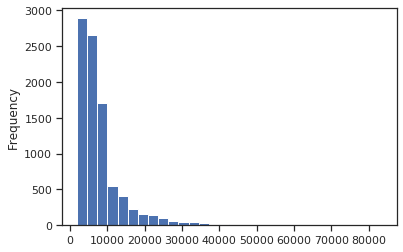

In [43]:
df_to_explore["Customer Lifetime Value"].plot.hist(bins=30)

The distribution has an exponential behaviour

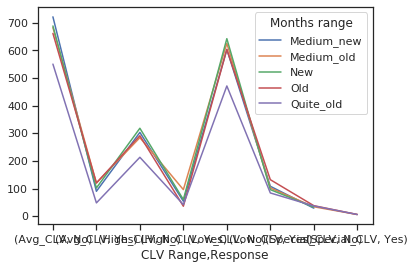

In [44]:
df_to_explore.groupby(["CLV Range","Months range","Response"]).agg(Total=("Gender","count"))["Total"].unstack(1).plot()

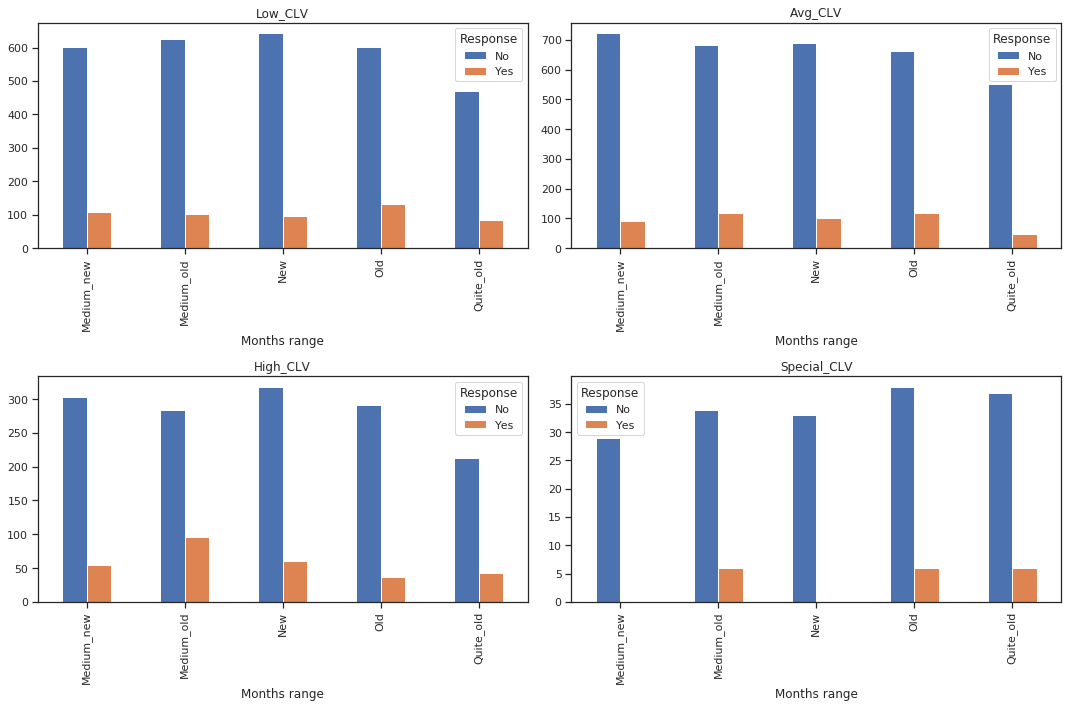

In [45]:
plt.figure(figsize=(15,10))
k=1
for i in df_to_explore["CLV Range"].unique():
    ax=plt.subplot(2,2,k)
    df_to_explore[df_to_explore["CLV Range"]==i].groupby(["Months range","Response"]).agg(Total=("Gender","count"))["Total"].unstack().plot(kind="bar",ax=ax,title=i)
    k+=1
plt.tight_layout()
plt.show()

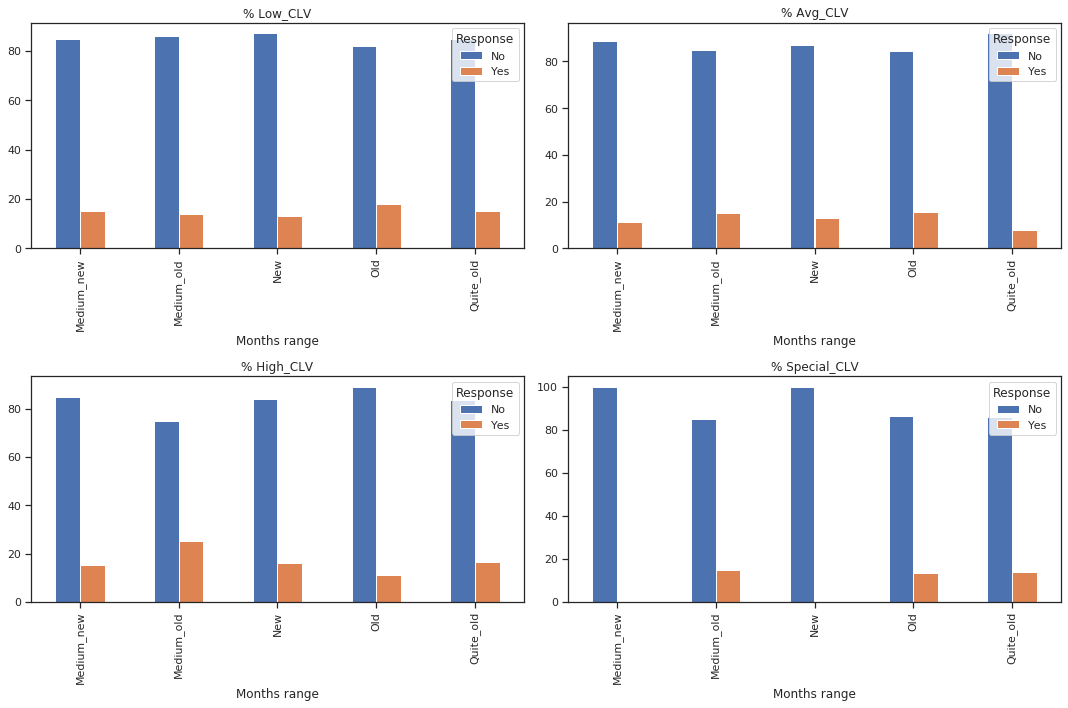

In [46]:
plt.figure(figsize=(15,10))
k=1
for i in df_to_explore["CLV Range"].unique():
    ax=plt.subplot(2,2,k)
    df_tmp=df_to_explore[df_to_explore["CLV Range"]==i].groupby(["Months range","Response"]).agg(Total=("Gender","count"))
    df_tmp.groupby(level=0).apply(lambda x: 100*x / float(x.sum()))["Total"].unstack().plot(kind="bar",ax=ax,title="% "+i)
    k+=1
plt.tight_layout()
plt.show()

For this case we see that people cataloged as "High_CLV" are the ones how performed the best. Something interesting to notice is that for the case of "Special CLV" there is a tendency from the new users as well as the Medium Users to Response "No" being this a sign of alarm to for the enterprise to take actions.